Import Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read Data:

In [3]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Untitled folder/new1SupervisedDataSet.csv")
data.head()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,temperature,humidity,rain,moisture,pressure
0,0,2.000000,3.333333,1.666667,4.000000,2.666667,2.333333,3.000000,2.666667,3.000000,2.666667,2.666667,2.333333,18.212550,84.334223,26668.91667,31.248533,1017.904157
1,0,4.000000,2.666667,2.333333,2.000000,2.333333,1.666667,2.333333,2.666667,2.666667,4.333333,3.333333,2.000000,19.171867,73.905807,27103.16667,75.938967,1013.189603
2,0,3.000000,2.666667,3.000000,2.000000,2.000000,2.000000,2.666667,3.000000,3.000000,5.000000,3.333333,2.000000,22.785017,78.169993,26689.16667,51.231067,1016.092942
3,0,3.000000,2.666667,2.666667,2.666667,3.000000,1.333333,3.333333,2.666667,2.666667,5.000000,3.000000,2.666667,23.298793,81.467820,18678.75000,72.093500,1017.477364
4,0,2.666667,3.666667,2.333333,3.666667,1.666667,3.666667,2.666667,3.000000,3.000000,3.666667,2.000000,3.333333,22.453283,80.013987,26713.91667,53.482733,1013.225318


Data Annalysis:

In [4]:
# Check for missing values
features_na = [features for features in data.columns if data[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


Data Processing:

In [5]:

X = data.drop(['Landslide'], axis=1)
y = data['Landslide']

print(X, y)


          Aspect  Curvature  Earthquake  Elevation      Flow  Lithology  \
0       2.000000   3.333333    1.666667   4.000000  2.666667   2.333333   
1       4.000000   2.666667    2.333333   2.000000  2.333333   1.666667   
2       3.000000   2.666667    3.000000   2.000000  2.000000   2.000000   
3       3.000000   2.666667    2.666667   2.666667  3.000000   1.333333   
4       2.666667   3.666667    2.333333   3.666667  1.666667   3.666667   
...          ...        ...         ...        ...       ...        ...   
190885  2.333333   2.666667    2.000000   4.666667  2.333333   3.000000   
190886  3.000000   3.000000    2.333333   3.000000  3.000000   1.666667   
190887  3.000000   3.000000    2.000000   1.333333  2.333333   1.666667   
190888  3.333333   4.000000    2.666667   3.000000  2.000000   2.333333   
190889  3.666667   4.000000    2.000000   2.333333  2.333333   2.000000   

            NDVI      NDWI      Plan  Precipitation   Profile     Slope  \
0       3.000000  2.6666

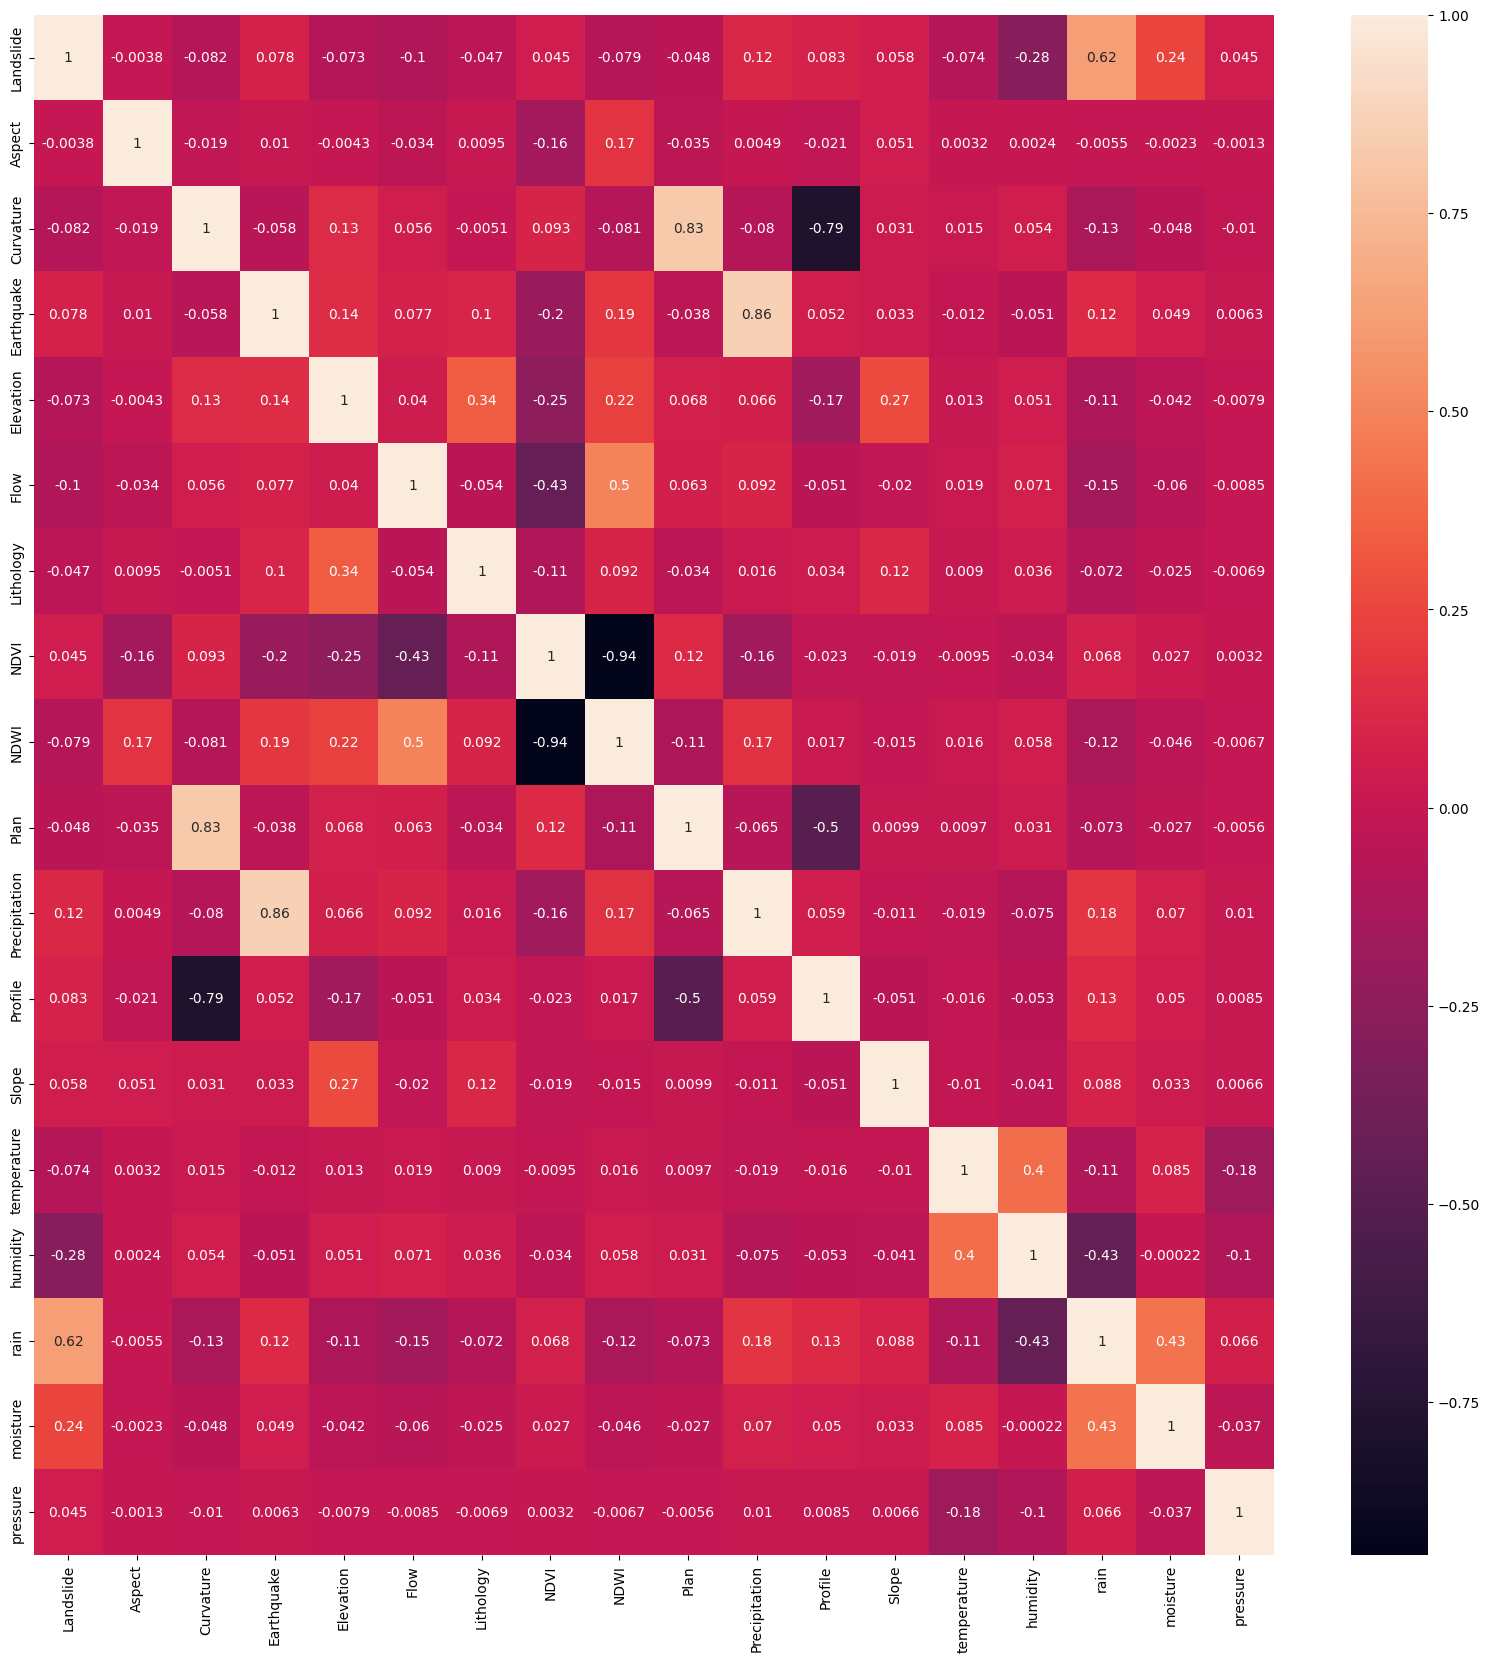

In [6]:
# Correlation analysis
data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)
plt.show()


In [7]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fit the Model:

In [8]:
# Fit Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

Feature Importance:

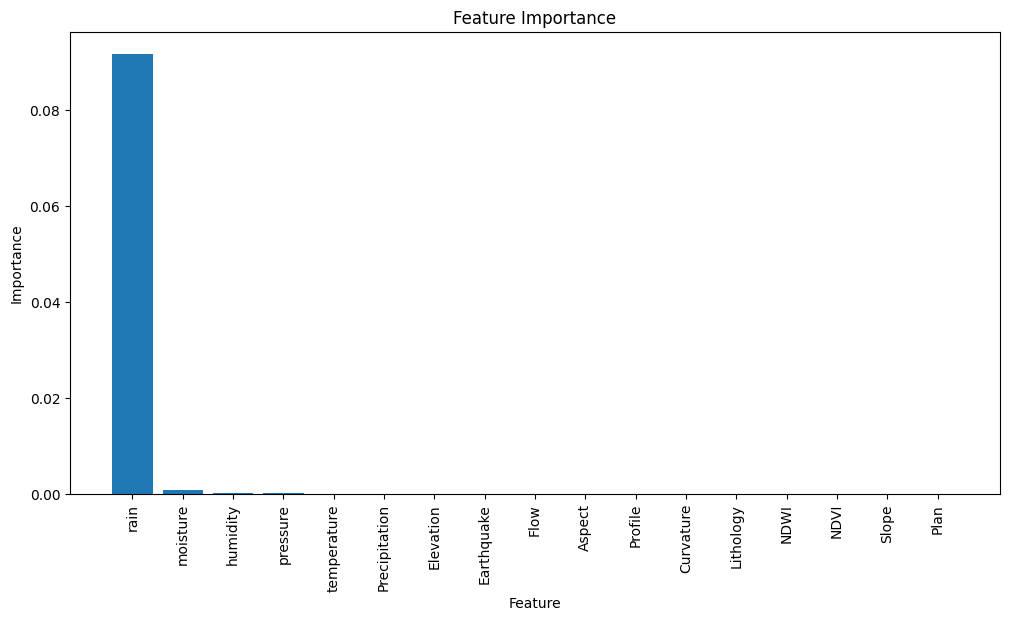

In [9]:
# Create and fit a classifier model (Random Forest, for example)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Calculate permutation feature importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get feature importances and indices
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(X_test.shape[1]), importances[indices], align="center")
plt.xticks(range(X_test.shape[1]), X_test.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()


Gradient Boosting Classifier:

Gradient Boosting Classifier Accuracy: 0.9971711456859972
Confusion Matrix (Gradient Boosting Classifier):
[[36235    28]
 [   80  1835]]
Precision (Gradient Boosting Classifier): 0.984970477724101
Recall (Gradient Boosting Classifier): 0.95822454308094
F1-score (Gradient Boosting Classifier): 0.9714134462678665


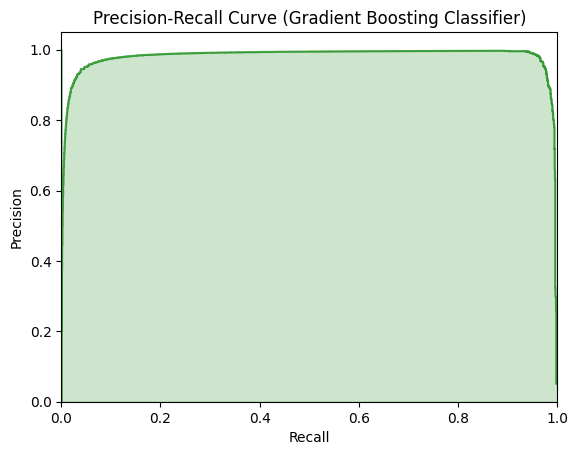

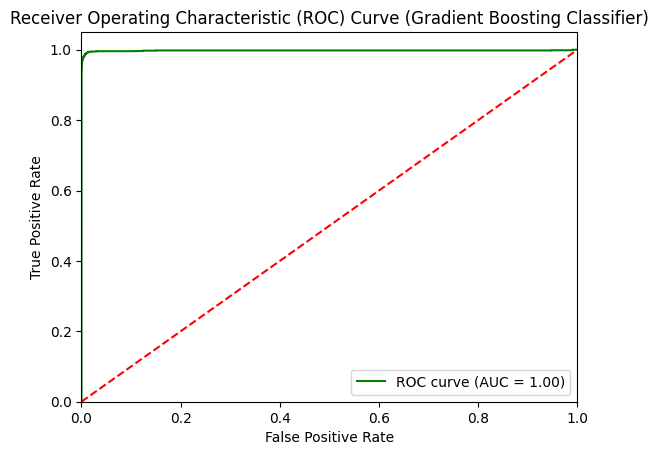

In [10]:
# Evaluate Gradient Boosting Classifier
gb_model_score = gb_model.score(X_test, y_test)
print("Gradient Boosting Classifier Accuracy:", gb_model_score)
# Confusion matrix for Gradient Boosting Classifier
gb_y_pred = gb_model.predict(X_test)
gb_cm = confusion_matrix(y_test, gb_y_pred)
print("Confusion Matrix (Gradient Boosting Classifier):")
print(gb_cm)

# Additional Evaluation Metrics for Gradient Boosting Classifier
gb_precision = precision_score(y_test, gb_y_pred)
gb_recall = recall_score(y_test, gb_y_pred)
gb_f1 = f1_score(y_test, gb_y_pred)

print("Precision (Gradient Boosting Classifier):", gb_precision)
print("Recall (Gradient Boosting Classifier):", gb_recall)
print("F1-score (Gradient Boosting Classifier):", gb_f1)

# Visualize Precision-Recall curve for Gradient Boosting Classifier
gb_y_pred_probs = gb_model.predict_proba(X_test)[:, 1]
gb_precision, gb_recall, _ = precision_recall_curve(y_test, gb_y_pred_probs)

plt.step(gb_recall, gb_precision, color='g', alpha=0.7, where='post')
plt.fill_between(gb_recall, gb_precision, step='post', alpha=0.2, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Gradient Boosting Classifier)')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Visualize ROC curve for Gradient Boosting Classifier
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, gb_y_pred_probs)
gb_roc_auc = auc(gb_fpr, gb_tpr)

plt.plot(gb_fpr, gb_tpr, color='g', label='ROC curve (AUC = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Gradient Boosting Classifier)')
plt.legend(loc="lower right")
plt.show()

# ... (continue with other visualizations and comparisons with other models)


Confusion Matrix (Gradient Boosting Classifier):
[[36235    28]
 [   80  1835]]


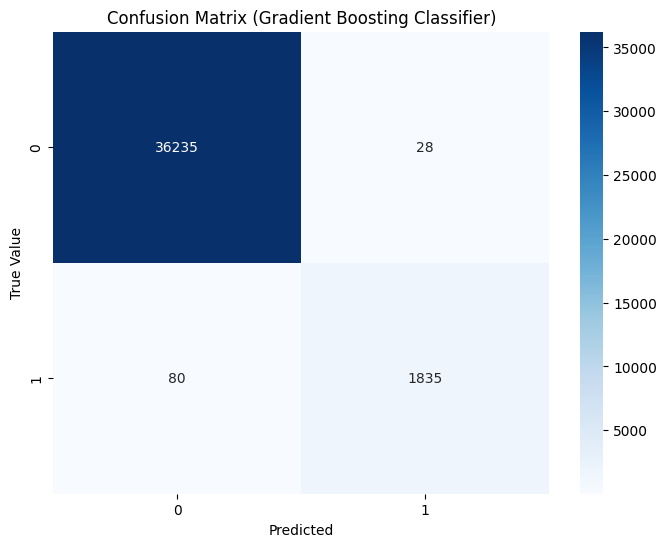

In [11]:

# Confusion matrix for Gradient Boosting Classifier
gb_y_pred = gb_model.predict(X_test)
gb_cm = confusion_matrix(y_test, gb_y_pred)
print("Confusion Matrix (Gradient Boosting Classifier):")
print(gb_cm)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues')  # Corrected usage of sns
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Confusion Matrix (Gradient Boosting Classifier)')
plt.show()


Error calculation

In [12]:
from sklearn.metrics import r2_score,mean_squared_error
print("r2 score of our model is:", r2_score(y_test,gb_y_pred))
print("mean squared error of our model is:", mean_squared_error(y_test,gb_y_pred))

r2 score of our model is: 0.9406248908737438
mean squared error of our model is: 0.002828854314002829


Precision curve,  Recall curve, F1-score curve, Accuracy curve of GradientBoostingClassifier:

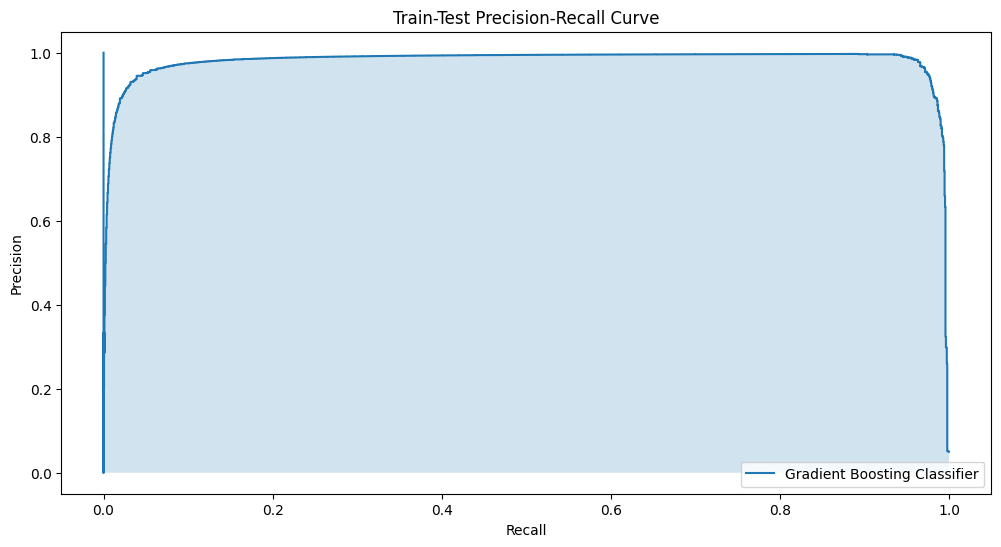

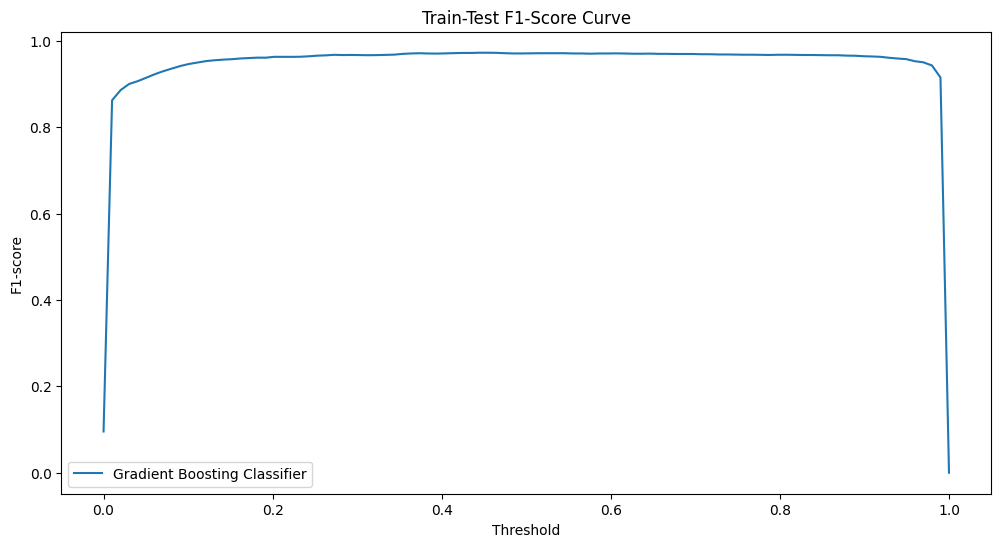

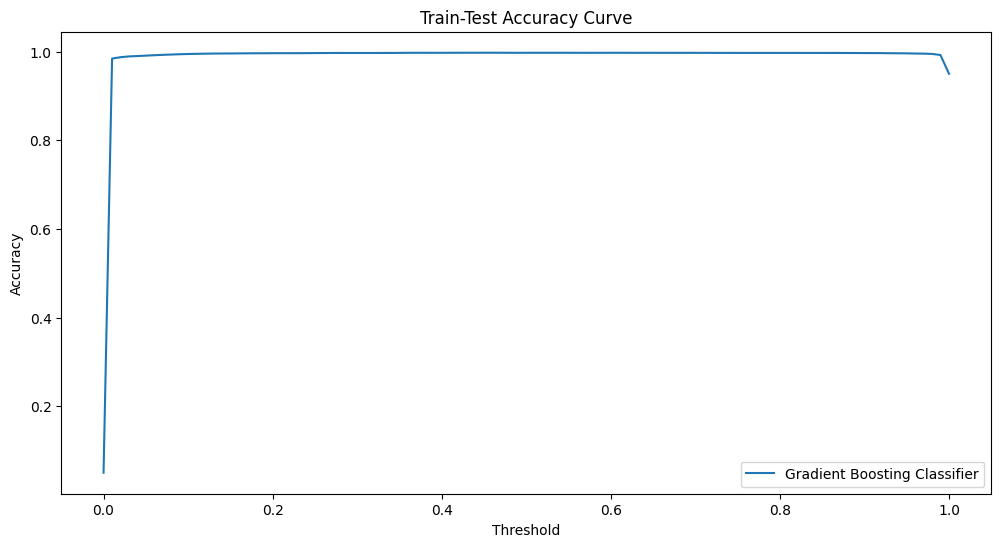

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score

# Function to plot precision-recall curve
def plot_precision_recall_curve(y_true, y_probs, label=None):
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    plt.step(recall, precision, label=label, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2)

# Function to plot F1-score curve
def plot_f1_score_curve(y_true, y_probs, label=None):
    thresholds = np.linspace(0, 1, 100)
    f1_scores = [f1_score(y_true, (y_probs >= threshold).astype(int)) for threshold in thresholds]
    plt.plot(thresholds, f1_scores, label=label)

# Function to plot accuracy curve
def plot_accuracy_curve(y_true, y_probs, label=None):
    thresholds = np.linspace(0, 1, 100)
    accuracies = [accuracy_score(y_true, (y_probs >= threshold).astype(int)) for threshold in thresholds]
    plt.plot(thresholds, accuracies, label=label)

# Get probabilities for the positive class from the Gradient Boosting model
gb_y_probs = gb_model.predict_proba(X_test)[:, 1]

# Plot Precision-Recall curve
plt.figure(figsize=(12, 6))
plot_precision_recall_curve(y_test, gb_y_probs, label='Gradient Boosting Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Train-Test Precision-Recall Curve')
plt.legend()
plt.show()

# Plot F1-score curve
plt.figure(figsize=(12, 6))
plot_f1_score_curve(y_test, gb_y_probs, label='Gradient Boosting Classifier')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.title('Train-Test F1-Score Curve')
plt.legend()
plt.show()

# Plot accuracy curve
plt.figure(figsize=(12, 6))
plot_accuracy_curve(y_test, gb_y_probs, label='Gradient Boosting Classifier')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Train-Test Accuracy Curve')
plt.legend()
plt.show()


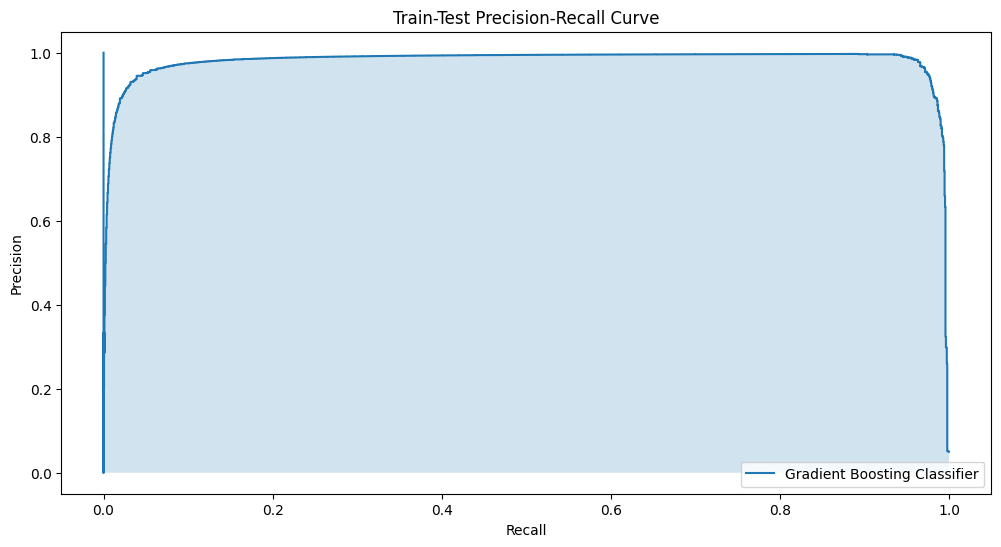

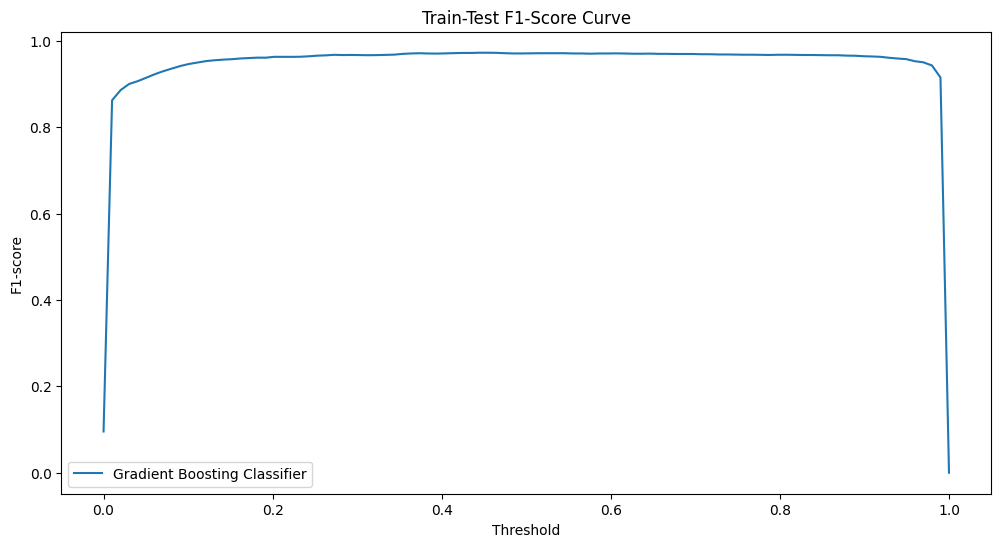

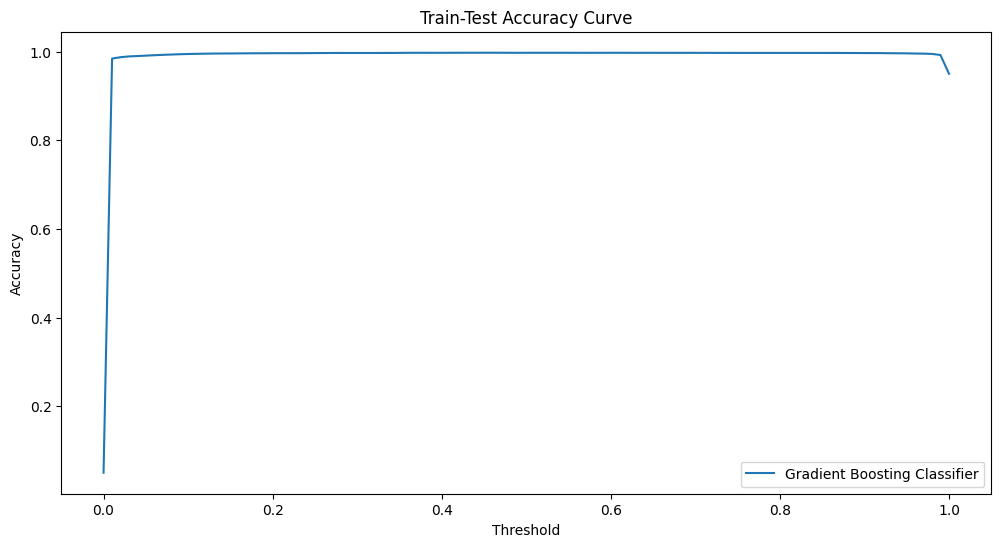

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score

# Function to plot precision-recall curve
def plot_precision_recall_curve(y_true, y_probs, label=None):
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    plt.step(recall, precision, label=label, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2)

# Function to plot F1-score curve
def plot_f1_score_curve(y_true, y_probs, label=None):
    thresholds = np.linspace(0, 1, 100)
    f1_scores = [f1_score(y_true, (y_probs >= threshold).astype(int)) for threshold in thresholds]
    plt.plot(thresholds, f1_scores, label=label)

# Function to plot accuracy curve
def plot_accuracy_curve(y_true, y_probs, label=None):
    thresholds = np.linspace(0, 1, 100)
    accuracies = [accuracy_score(y_true, (y_probs >= threshold).astype(int)) for threshold in thresholds]
    plt.plot(thresholds, accuracies, label=label)

# Get probabilities for the positive class from the Gradient Boosting model
#gb_y_probs = gb_model.predict_proba(X_test)[:, 1]

# Plot Precision-Recall curve
plt.figure(figsize=(12, 6))
plot_precision_recall_curve(y_test, gb_y_probs, label='Gradient Boosting Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Train-Test Precision-Recall Curve')
plt.legend()
plt.show()

# Plot F1-score curve
plt.figure(figsize=(12, 6))
plot_f1_score_curve(y_test, gb_y_probs, label='Gradient Boosting Classifier')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.title('Train-Test F1-Score Curve')
plt.legend()
plt.show()

# Plot accuracy curve
plt.figure(figsize=(12, 6))
plot_accuracy_curve(y_test, gb_y_probs, label='Gradient Boosting Classifier')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Train-Test Accuracy Curve')
plt.legend()
plt.show()
